# TOP 11 AFRICAN COUNTRIES BASED ON GDP

<img src=https://us.123rf.com/450wm/hamik/hamik1104/hamik110400008/9255646-detail-color-map-of-african-continent-with-borders-each-state-is-colored-to-the-various-color-and-ha.jpg width=400>

* Exploring the primary school completion rate of boys and girls for the various african countries on a spread of 2000 till 2019
* Exploring the GDP capital for each country on a spread of 2000 till 2019
* Exploring the life expectancy trend for each country from 2000 till 2019
* Exploring the 15 plus employment rate of the various african countries from 2000 till 2019

In [72]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [73]:
#importing the datasets
pri_sch_girls_completion = pd.read_csv('primary_school_completion_percent_of_girls.csv')
pri_sch_boys_completion = pd.read_csv('primary_school_completion_percent_of_boys.csv')
gdp_capital = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
life_expectancy = pd.read_csv('life_expectancy_years.csv') #2021
employment = pd.read_csv('aged_15plus_employment_rate_percent.csv') #2021


### Building up both help and main functions

In [74]:
def fill_na_by_row(data):
    """
    This funtion removes all empty entries and replaces it with the mean
    value by country.
    data = pass in adjusted data
    """
    for i in list(data.index):
        data.loc[i,:].fillna(data.loc[i,:].mean(),inplace = True)
    return data

In [75]:
def adjust_data(data):
    """
    This function is built to adjust the imported data for the project.
    it trims the data to 2000 to 2019.
    It makes the country column the index.
    It trimms down the countries to African countries with the highest Gross Domestic Product (GDP) in 2020
    (in billion U.S. dollars) according to 
    https://www.statista.com/statistics/1120999/gdp-of-african-countries-by-country/
    It returns the adjusted data
    
    data = csv file imported for this project
    """
    x = data.loc[:,'2000':'2019'] #considering only data from 2000 to 2019
    y = data.loc[:,['country']] #picking out the countries column
    data = pd.concat([y,x], axis=1) #combining both dataframes togethe
    data = data[data['country'].isin(['Nigeria', 'Egypt', 'South Africa', 'Algeria', 'Morocco', 
                                                          'Kenya', 'Ethiopia', 'Ghana', 'Tanzania'
                                                         ' Angola', 'Cote d\'Ivoire', 'Congo, Rep.', 'Tunisia'])] #filters out this 13 african countries which would be considered in this project
    data = data.set_index('country') #converting the country coolumn to the index
    return fill_na_by_row(data) # calling the fill_na_by_row function
   

In [76]:
def stats(data):
    """
    This function returns maximum values and minimum values from the inputed data set
    """
    x = pd.DataFrame(data.max(axis=1), columns=['Max'])
    y = pd.DataFrame(data.min(axis=1), columns=['Min'])
    data_stats=pd.merge(x,y, on='country')
    
    max_country = data_stats.idxmax()['Max']
    max_value = data_stats.max()['Max']
    
    min_country = data_stats.idxmin()['Min']
    min_value = data_stats.min()['Min']
    
    
    max_value_2019 = data.loc[:,['2019']].max()[0] #to give value of max
    max_country_2019 = data.loc[:,['2019']].idxmax()[0] #to give country of max

    min_value_2019 = data.loc[:,['2019']].min()[0] #to give value of max
    min_country_2019 = data.loc[:,['2019']].idxmin()[0] #to give country of max

    
    
    print('A TABLE TO SHOW THE GENERAL MAXIMUM AND MINIMUM DISTRIBUTION BY AVERAGE ACROSS THE YEARS')
    print(data_stats)
    print("\nMAXIMUM\n {} had the the highest overall average of {}".format(max_country,max_value))
    print("\nMINIMUM\n {} had the lowest overall average of {}".format(min_country,min_value))
    print('\n---------------------------------------------------------------------')
    print('\n\nTHIS IS THE DISTRIBUTION OF MIN AND MAX AT 2019')
    print('\nMINIMUM\n{} has the lowest average with {}'.format(min_country_2019,round(min_value_2019,2)))
    print('\nMAXIMUM\n{} has the maximum average with {}'.format(max_country_2019,max_value_2019))
    

In [77]:
def display_stats(data):
    """
    Function to return the adjusted data statistics
    """
    data = adjust_data(data)
    return stats(data)

In [78]:
def matrix_maker(data):
    """
    This converts the data to a matrix format
    """
    data1= adjust_data(data)
    return data1.to_numpy()

In [79]:
#season
season = list(range(2000,2020))

d_season = {'2000':0,'2001':1,'2002':2,'2003':3,'2004':4,'2005':5,'2006':6,'2007':7,'2008':8,'2009':9,'2010':10,'2011':11,\
         '2012':12,'2013':13,'2014':14,'2015':15,'2016':16,'2017':17,'2018':18,'2019':19,'2020':20} #building a dictionary for the season/year
#country
country = ['Algeria','Congo, Rep.','Cote d\'Ivoire','Egypt','Ethiopia','Ghana','Kenya','Morocco','Nigeria','South Africa','Tunisia']
d_country = {'Nigeria':8, 'Egypt':3, 'South Africa':9, 'Algeria':0, 'Morocco':7, 'Kenya':6, 'Ethiopia':4, 'Ghana':5,
            'Cote d\'Ivoire':2, 'Congo, Rep.':1, 'Tunisia':10} # building a dictionary for the countries

In [80]:


def plot(data, country_list=country):
    """
    Function to build line plots to show the trend over the years by country.
    """
    
    data = matrix_maker(data)
    
    
    col = {'Nigeria':'Black', 'Egypt':'Red', 'South Africa':'Blue', 'Algeria':'Green', 'Morocco':'Magenta', 'Kenya':'Red', 'Ethiopia':'Blue', 'Ghana':'Green',
            'Cote d\'Ivoire':'Magenta', 'Congo, Rep.':'Blue', 'Tunisia':'Green'}
    mark = {'Nigeria':'D', 'Egypt':'o', 'South Africa':'s', 'Algeria':'^', 'Morocco':'o', 'Kenya':'s', 'Ethiopia':'^', 'Ghana':'s',
            'Cote d\'Ivoire':'^', 'Congo, Rep.':'D', 'Tunisia':'o'}
    plt.figure(figsize=(10,8))
    for country in country_list:
        plt.plot(data[d_country[country]], c=col[country], ls ='--', marker=mark[country], ms=5, label=country)
        
        
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.xticks(list(range(0,20)),season, rotation='vertical')
    plt.title('TREND')
    plt.show()

### Analysis on **Primary School Girls Completion** Within The African Countries

In [81]:
display_stats(pri_sch_girls_completion)

A TABLE TO SHOW THE GENERAL MAXIMUM AND MINIMUM DISTRIBUTION BY AVERAGE ACROSS THE YEARS
                 Max    Min
country                    
Algeria        1.090  0.799
Congo, Rep.    0.768  0.542
Cote d'Ivoire  0.751  0.332
Egypt          1.050  0.861
Ethiopia       0.557  0.158
Ghana          1.040  0.619
Kenya          1.000  0.846
Morocco        0.977  0.521
Nigeria        0.802  0.641
South Africa   0.959  0.824
Tunisia        1.050  0.863

MAXIMUM
 Algeria had the the highest overall average of 1.09

MINIMUM
 Ethiopia had the lowest overall average of 0.158

---------------------------------------------------------------------


THIS IS THE DISTRIBUTION OF MIN AND MAX AT 2019

MINIMUM
Ethiopia has the lowest average with 0.39

MAXIMUM
Egypt has the maximum average with 1.05


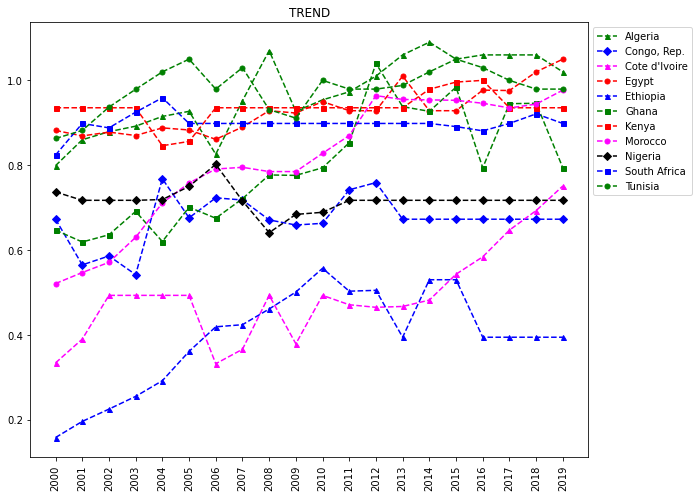

In [82]:
plot(pri_sch_girls_completion)

### Findings
**Primary school completion rate for girls**
* When looking generally from 2000 to 2019, Algeria had the the highest overall average of 1.09 (109%)and Ethiopia had the lowest overall average of 0.158 (15.8%) and also Ghana (moving from a rate of above 60% to a rate of about 78%). 
* When taking the current state (which in data situation is 2019) Ethiopia has the lowest average with 0.39 (39%) and Egypt has the maximum average with 1.05 (105%).
* From the trend Diagram the countries that improved most were Cote d'ivoire (moving from a rate of above 38% to a rate of about 78%), Ethiopia (moving from a rate of less than 20% to a rate of  50% in 2010 but drops to 40% in 2016 and maintained till 2019),Morocco(moving from a rate of above 50% to a rate of about 97%).
* Countries with a good overall trend of primary completion rate since 2000 to 2019 can be said to be Algeria, Egypt and Tunisia.
* Counties which could be said to have made no improvement over time are Nigeria and Congo Rep.


### Analysis on **Primary School Boys Completion** Within The African Countries

In [83]:
display_stats(pri_sch_boys_completion)

A TABLE TO SHOW THE GENERAL MAXIMUM AND MINIMUM DISTRIBUTION BY AVERAGE ACROSS THE YEARS
                 Max    Min
country                    
Algeria        1.190  0.804
Congo, Rep.    0.839  0.565
Cote d'Ivoire  0.823  0.531
Egypt          1.040  0.886
Ethiopia       0.597  0.287
Ghana          0.991  0.673
Kenya          0.993  0.881
Morocco        0.995  0.650
Nigeria        1.020  0.753
South Africa   0.954  0.797
Tunisia        1.020  0.864

MAXIMUM
 Algeria had the the highest overall average of 1.19

MINIMUM
 Ethiopia had the lowest overall average of 0.287

---------------------------------------------------------------------


THIS IS THE DISTRIBUTION OF MIN AND MAX AT 2019

MINIMUM
Ethiopia has the lowest average with 0.49

MAXIMUM
Egypt has the maximum average with 1.04


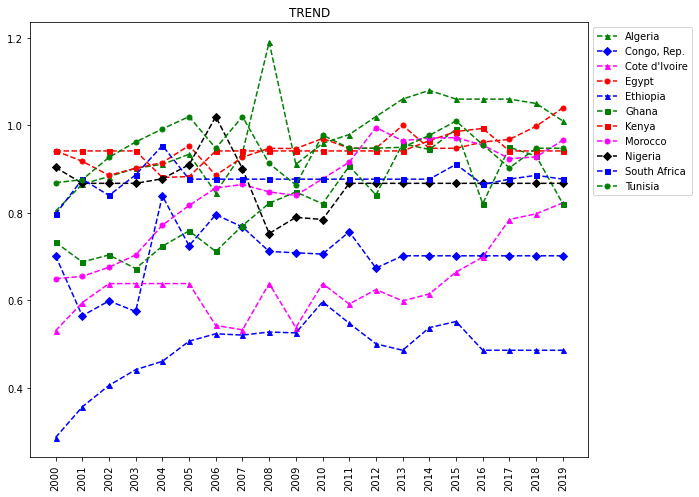

In [84]:
plot(pri_sch_boys_completion)

### Findings
**Primary school completion rate for boys**
* When looking generally from 2000 to 2019, Algeria had the the highest overall average of 1.19 (119%)and Ethiopia had the lowest overall average of 0.287 (28.7%). 
* When taking the current state (which in this data situation is 2019) Ethiopia has the lowest average with 0.49 (49%) and Egypt has the maximum average with 1.04 (104%).
* From the trend Diagram the countries that improved most were Cote d'ivoire (moving from a rate of above 50% to a rate of about 80%) and Morocco(moving from a rate of above 60% to a rate of about 97%).
* Countries with a good overall trend of primary completion rate since 2000 to 2019 can be said to be Algeria, Egypt and Tunisia.
* Counties which could be said to have made no improvement over time are Nigeria and Congo Rep.
* Kenya sits on a consistency rate of above 90%.

### Analysis on **GDP Capital** Within The African Countries

In [85]:
display_stats(gdp_capital)

A TABLE TO SHOW THE GENERAL MAXIMUM AND MINIMUM DISTRIBUTION BY AVERAGE ACROSS THE YEARS
                  Max     Min
country                      
Algeria        4830.0  3560.0
Congo, Rep.    3010.0  2440.0
Cote d'Ivoire  1740.0  1130.0
Egypt          3010.0  1980.0
Ethiopia        602.0   195.0
Ghana          1880.0   953.0
Kenya          1240.0   810.0
Morocco        3400.0  1980.0
Nigeria        2560.0  1380.0
South Africa   7580.0  5940.0
Tunisia        4410.0  3000.0

MAXIMUM
 South Africa had the the highest overall average of 7580.0

MINIMUM
 Ethiopia had the lowest overall average of 195.0

---------------------------------------------------------------------


THIS IS THE DISTRIBUTION OF MIN AND MAX AT 2019

MINIMUM
Ethiopia has the lowest average with 602.0

MAXIMUM
South Africa has the maximum average with 7350.0


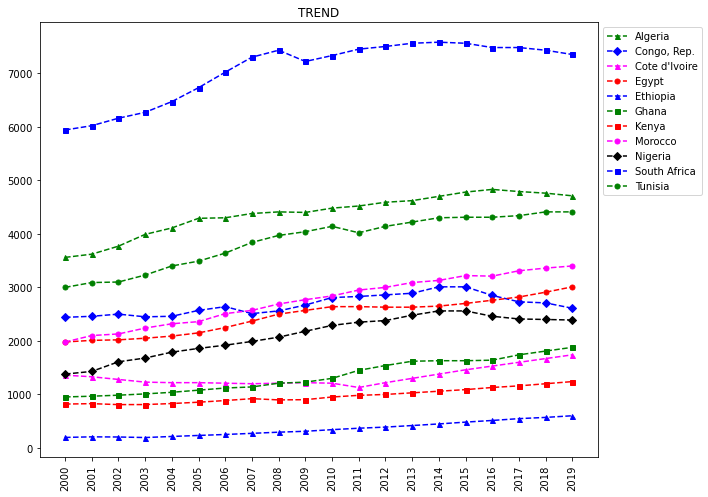

In [86]:
plot(gdp_capital)

### Findings
**Primary GDP Capital**
* When looking generally from 2000 to 2019, South Africa had the the highest overall average of 7580.0 and  Ethiopia had the lowest overall average of 195.0. 
* When taking the current state (which in this data situation is 2019) Ethiopia has the lowest average with 602.0 and South Africa has the maximum average with 7350.0.
* From the trend Diagram the countries that improved most were South Africa, Tunisia, Nigeria, Morocco.
* Countries with a good overall trend South Africa.
* Counties which could be said to have made no or very little improvement over time are Ethiopia, Congo, Kenya, Cote d'ivoire.


### Analysis of Life Expectancy Within the Countries

In [88]:
display_stats(life_expectancy)

A TABLE TO SHOW THE GENERAL MAXIMUM AND MINIMUM DISTRIBUTION BY AVERAGE ACROSS THE YEARS
                Max   Min
country                  
Algeria        78.1  74.0
Congo, Rep.    63.3  52.8
Cote d'Ivoire  63.3  52.3
Egypt          71.0  68.4
Ethiopia       69.1  50.8
Ghana          66.1  59.4
Kenya          66.7  55.6
Morocco        74.4  69.3
Nigeria        65.2  55.2
South Africa   66.9  52.0
Tunisia        78.7  74.3

MAXIMUM
 Tunisia had the the highest overall average of 78.7

MINIMUM
 Ethiopia had the lowest overall average of 50.8

---------------------------------------------------------------------


THIS IS THE DISTRIBUTION OF MIN AND MAX AT 2019

MINIMUM
Congo, Rep. has the lowest average with 63.3

MAXIMUM
Tunisia has the maximum average with 78.7


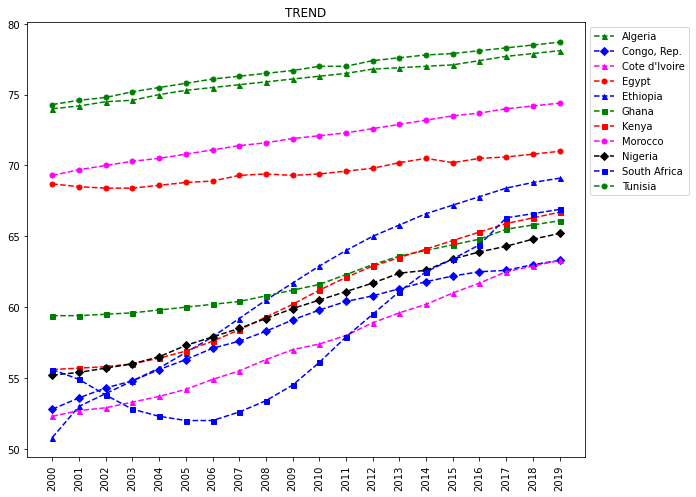

In [89]:
plot(life_expectancy)

### Analysis on **Employment** Within The African Countries

In [91]:
display_stats(employment)

A TABLE TO SHOW THE GENERAL MAXIMUM AND MINIMUM DISTRIBUTION BY AVERAGE ACROSS THE YEARS
                 Max    Min
country                    
Algeria        0.394  0.306
Congo, Rep.    0.629  0.543
Cote d'Ivoire  0.629  0.558
Egypt          0.444  0.406
Ethiopia       0.800  0.748
Ghana          0.754  0.669
Kenya          0.636  0.578
Morocco        0.455  0.441
Nigeria        0.531  0.512
South Africa   0.433  0.385
Tunisia        0.410  0.383

MAXIMUM
 Ethiopia had the the highest overall average of 0.8

MINIMUM
 Algeria had the lowest overall average of 0.306

---------------------------------------------------------------------


THIS IS THE DISTRIBUTION OF MIN AND MAX AT 2019

MINIMUM
Algeria has the lowest average with 0.37

MAXIMUM
Ethiopia has the maximum average with 0.7829999999999999


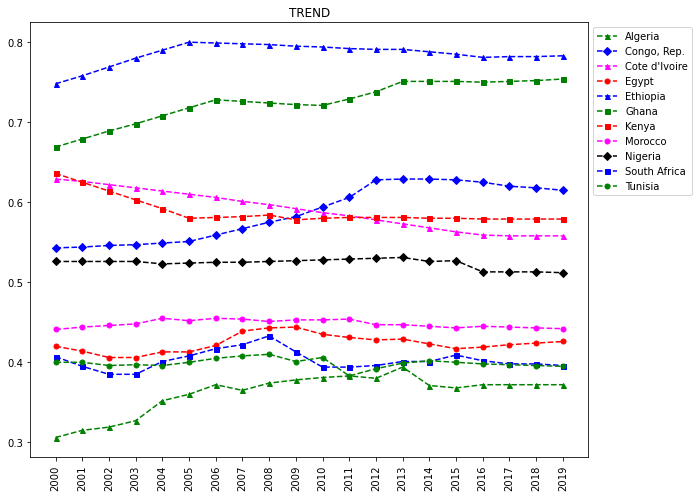

In [92]:
plot(employment)

### Findings
**Employment**
* When looking generally from 2000 to 2019, Ethiopia had the the highest overall average of 0.8 (80%) and Algeria had the lowest overall average of 0.306 (30%). 
* When taking the current state (which in this data situation is 2019) Algeria has the lowest average with 0.37 (37%) and Ethiopia has the maximum average with 0.78 (78%).
* From the trend Diagram the countries that improved most were Ghana (from about 65% to above 70%), Congo (from 55% to above 60%), and Algeria (from 30% to 35%).
* We see massive declines in countries like Cote d'Ivoire, Kenya, and a slight decline in Nigeria
* Few countries have not made significant changes over the year, such as, Morocco, Egypt, South Africa and Tunisia.